# 연습문제

---

## 목차
1. kaggle의 HR 데이터를 기반으로 타깃(left)을 예상할 수 있는 분류 모델기 생성
2. 차원 축소를 수행한 후 분류 모델기 생성

## 문제 1. kaggle의 HR 데이터를 기반으로 타깃(left)을 예상할 수 있는 분류 모델기 생성

- 데이터 불러오기
- 상관 계수 분석(문자열 데이터 미포함)
- 차원 축소(문자열 데이터 미포함)
- 문자열 원 핫 인코딩
- 상관 계수 분석(문자열 데이터 포함)
- 차원 축소(문자열 데이터 포함)

In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 '2019-08-01.md',
 'HR_comma_sep.csv',
 'img',
 'ML_Day13.ipynb',
 'PCA.ipynb',
 'PCA_human_resource.ipynb',
 'Untitled.ipynb']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as sns
import matplotlib as mpl
import seaborn as sns

In [112]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [113]:
df = pd.read_csv('HR_comma_sep.csv')

In [114]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [117]:
X = df.loc[:, df.columns.drop(['sales', 'salary', 'left'])]
Y = df.loc[:, 'left']

In [118]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [122]:
Y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [6]:
X.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [7]:
corr = df.corr()

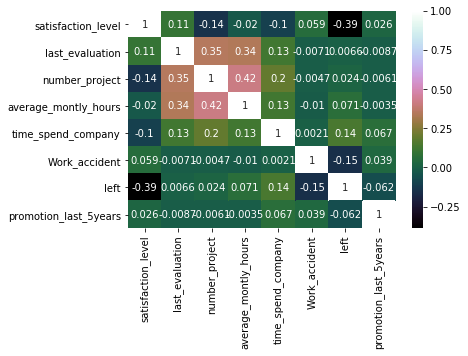

In [10]:
sns.heatmap(corr, cmap='cubehelix', annot=True)

> 차원 축소(numpy 버젼)

In [14]:
# 행렬 A를 만들어서 AX = lambda X 수식을 풀어줍니다.
corr.T*corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.011029,0.020440,0.000402,0.010174,0.003445,0.150835,0.000656
last_evaluation,0.011029,1.000000,0.122033,0.115424,0.017316,0.000050,0.000043,0.000075
number_project,0.020440,0.122033,1.000000,0.174065,0.038725,0.000022,0.000566,0.000037
average_montly_hours,0.000402,0.115424,0.174065,1.000000,0.016321,0.000103,0.005082,0.000013
time_spend_company,0.010174,0.017316,0.038725,0.016321,1.000000,0.000004,0.020973,0.004547
Work_accident,0.003445,0.000050,0.000022,0.000103,0.000004,1.000000,0.023908,0.001540
left,0.150835,0.000043,0.000566,0.005082,0.020973,0.023908,1.000000,0.003818
promotion_last_5years,0.000656,0.000075,0.000037,0.000013,0.004547,0.001540,0.003818,1.000000


In [15]:
A = corr.T * corr

In [63]:
eigVals, eigVecs = np.linalg.eig(A)

In [85]:
# 고유 벡터와 고유 값을 합친 행렬을 생성
dfEig = pd.concat([pd.DataFrame(eigVecs),pd.Series(eigVals)], ignore_index=True, axis=1)
dfEig

,0,1,2,3,4,5,6,7,8
0,-0.113401,-0.679470,-0.295260,0.628996,-0.038882,0.138602,-0.099880,0.109302,1.285345
1,-0.506170,0.083436,-0.025797,-0.088384,-0.845307,0.102194,-0.043891,-0.037941,1.153403
2,-0.600836,0.074927,0.664668,0.302478,0.316286,0.004970,-0.006186,-0.002203,0.818497
3,-0.581836,0.112075,-0.619185,-0.268199,0.423082,0.100420,-0.042541,-0.051886,0.852516
4,-0.155808,-0.100945,-0.098976,0.009512,-0.050314,-0.848685,0.381432,0.295565,0.898104
5,-0.008763,-0.124154,-0.030473,0.090972,-0.009974,-0.236711,0.158124,-0.945606,0.990727
6,-0.083816,-0.697841,0.276138,-0.651611,0.047705,0.043862,-0.030417,0.004244,1.001986
7,-0.004149,-0.024442,-0.002085,0.012821,0.001318,0.426631,0.902680,0.048683,0.999421


In [104]:
# 고유값(8번째 컬럼)에 의해서 고유벡터들을 정렬합니다.
dfEigSorted = dfEig.sort_values(by=8, ascending=False).reset_index(drop=True)
dfEigSorted

,0,1,2,3,4,5,6,7,8
0,-0.113401,-0.679470,-0.295260,0.628996,-0.038882,0.138602,-0.099880,0.109302,1.285345
1,-0.506170,0.083436,-0.025797,-0.088384,-0.845307,0.102194,-0.043891,-0.037941,1.153403
2,-0.083816,-0.697841,0.276138,-0.651611,0.047705,0.043862,-0.030417,0.004244,1.001986
3,-0.004149,-0.024442,-0.002085,0.012821,0.001318,0.426631,0.902680,0.048683,0.999421
4,-0.008763,-0.124154,-0.030473,0.090972,-0.009974,-0.236711,0.158124,-0.945606,0.990727
5,-0.155808,-0.100945,-0.098976,0.009512,-0.050314,-0.848685,0.381432,0.295565,0.898104
6,-0.581836,0.112075,-0.619185,-0.268199,0.423082,0.100420,-0.042541,-0.051886,0.852516
7,-0.600836,0.074927,0.664668,0.302478,0.316286,0.004970,-0.006186,-0.002203,0.818497


In [105]:
dfEigSorted[8]/8 # 

0    0.160668
1    0.144175
2    0.125248
3    0.124928
4    0.123841
5    0.112263
6    0.106564
7    0.102312
Name: 8, dtype: float64

In [106]:
dfEigSorted[8].cumsum()

0    1.285345
1    2.438749
2    3.440734
3    4.440156
4    5.430883
5    6.328987
6    7.181503
7    8.000000
Name: 8, dtype: float64

In [107]:
sorted_vecs = np.matrix(dfEigSorted.iloc[:, :8], dtype=np.float)
sorted_vecs
sorted_vals = np.array(dfEigSorted.iloc[:, 8])
sorted_vals

array([1.2853455 , 1.15340328, 1.00198554, 0.99942148, 0.99072678,
       0.89810438, 0.85251558, 0.81849747])

In [111]:
sorted_vecs

matrix([[-0.113401  , -0.67947019, -0.29526049,  0.62899637, -0.03888184,
          0.13860196, -0.09987994,  0.10930225],
        [-0.50616965,  0.08343598, -0.02579719, -0.08838371, -0.84530701,
          0.10219445, -0.0438909 , -0.03794074],
        [-0.08381643, -0.69784137,  0.2761375 , -0.65161145,  0.04770458,
          0.04386216, -0.03041717,  0.00424368],
        [-0.004149  , -0.02444184, -0.00208464,  0.01282073,  0.00131817,
          0.42663139,  0.90267963,  0.04868325],
        [-0.00876333, -0.1241537 , -0.03047259,  0.09097213, -0.00997419,
         -0.23671052,  0.15812441, -0.94560556],
        [-0.15580756, -0.10094469, -0.09897614,  0.0095124 , -0.05031435,
         -0.84868532,  0.38143218,  0.29556488],
        [-0.58183586,  0.11207458, -0.61918541, -0.26819936,  0.42308244,
          0.1004202 , -0.04254127, -0.05188566],
        [-0.60083636,  0.07492681,  0.66466838,  0.30247765,  0.31628632,
          0.00496991, -0.00618589, -0.00220336]])

In [109]:
sorted_vecs[0].dot(sorted_vals.T)

matrix([[-0.50640472]])

In [54]:
eigLst[2]

array([[-0.67947019, -0.29526049, -0.113401  , -0.09987994, -0.03888184,
         0.10930225,  0.13860196,  0.62899637],
       [-0.84530701, -0.50616965, -0.08838371, -0.0438909 , -0.03794074,
        -0.02579719,  0.08343598,  0.10219445],
       [-0.60083636, -0.00618589, -0.00220336,  0.00496991,  0.07492681,
         0.30247765,  0.31628632,  0.66466838],
       [-0.61918541, -0.58183586, -0.26819936, -0.05188566, -0.04254127,
         0.1004202 ,  0.11207458,  0.42308244],
       [-0.84868532, -0.15580756, -0.10094469, -0.09897614, -0.05031435,
         0.0095124 ,  0.29556488,  0.38143218],
       [-0.94560556, -0.23671052, -0.1241537 , -0.03047259, -0.00997419,
        -0.00876333,  0.09097213,  0.15812441],
       [-0.69784137, -0.65161145, -0.08381643, -0.03041717,  0.00424368,
         0.04386216,  0.04770458,  0.2761375 ],
       [-0.02444184, -0.004149  , -0.00208464,  0.00131817,  0.01282073,
         0.04868325,  0.42663139,  0.90267963]])

AttributeError: 'int' object has no attribute 'any'

In [27]:
eigLst[1]

array([[-0.67947019, -0.29526049, -0.113401  , -0.09987994, -0.03888184,
         0.10930225,  0.13860196,  0.62899637],
       [-0.84530701, -0.50616965, -0.08838371, -0.0438909 , -0.03794074,
        -0.02579719,  0.08343598,  0.10219445],
       [-0.60083636, -0.00618589, -0.00220336,  0.00496991,  0.07492681,
         0.30247765,  0.31628632,  0.66466838],
       [-0.61918541, -0.58183586, -0.26819936, -0.05188566, -0.04254127,
         0.1004202 ,  0.11207458,  0.42308244],
       [-0.84868532, -0.15580756, -0.10094469, -0.09897614, -0.05031435,
         0.0095124 ,  0.29556488,  0.38143218],
       [-0.94560556, -0.23671052, -0.1241537 , -0.03047259, -0.00997419,
        -0.00876333,  0.09097213,  0.15812441],
       [-0.69784137, -0.65161145, -0.08381643, -0.03041717,  0.00424368,
         0.04386216,  0.04770458,  0.2761375 ],
       [-0.02444184, -0.004149  , -0.00208464,  0.00131817,  0.01282073,
         0.04868325,  0.42663139,  0.90267963]])

In [46]:
eigLst[0] = np.sort(eigLst[0])[::-1]

In [37]:
explained_variance = eigLst[0].cumsum()
explained_variance_ratio_ = explained_variance / max(explained_variance)
explained_variance_ratio_

array([0.16066819, 0.3048436 , 0.40715578, 0.51372023, 0.62598327,
       0.74982412, 0.87507232, 1.        ])